# Multiple Linear Regression - MLR

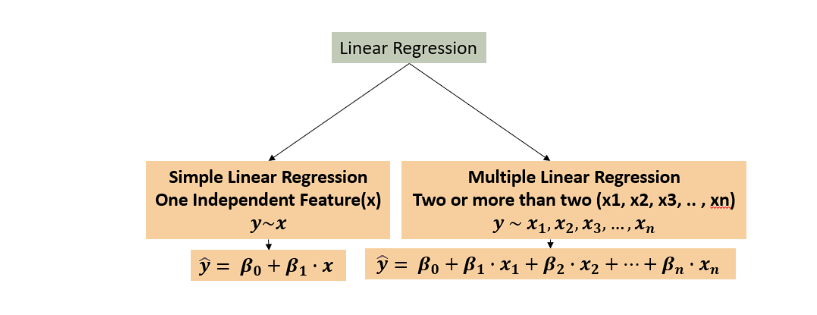

## 1. Impoer Pandas, Read Dataset

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
import pandas as pd
df = pd.read_csv('50_Startups.csv')
df.head()

,RND,ADMIN,MKT,STATE,PROFIT
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


### Perform Basic Data Quality Check

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RND     50 non-null     float64
 1   ADMIN   50 non-null     float64
 2   MKT     50 non-null     float64
 3   STATE   50 non-null     object 
 4   PROFIT  50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [4]:
df.isna().sum()

RND       0
ADMIN     0
MKT       0
STATE     0
PROFIT    0
dtype: int64

In [5]:
df.duplicated().sum()

0

## PROFIT ~ RND, ADMIN, MKT

## 2. Separate X and Y (PROFIT)

In [6]:
X = df[['RND', 'ADMIN', 'MKT']]
Y = df[['PROFIT']]

In [7]:
X.head()

,RND,ADMIN,MKT
0,165349.20,136897.80,471784.10
1,162597.70,151377.59,443898.53
2,153441.51,101145.55,407934.54
3,144372.41,118671.85,383199.62
4,142107.34,91391.77,366168.42


In [8]:
Y.head()

,PROFIT
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94


## 3. Create Linear Regression Model

### PROFIT_pred = B0 + B1*RND + B2*ADMIN + B3*MKT

In [9]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, Y)

LinearRegression()

### 3(i) Check r2 score for the model

In [10]:
model.score(X, Y)

0.9507459940683246

### 3(ii) Get coefficient and intercept for the above model

In [11]:
model.coef_

array([[ 0.80571505, -0.02681597,  0.02722806]])

In [12]:
X.columns

Index(['RND', 'ADMIN', 'MKT'], dtype='object')

In [13]:
model.intercept_

array([50122.19298987])

#### PROFIT_pred = 50122.19 + 0.8057xRND - 0.0268xADMIN + 0.0272xMKT

## 3. Conclusions of the above model

1. if RND increase by 1000, profit increases by 805.7
2. if ADMIN increase by 1000, profit will decrease by 26.8
3. if MKT increase by 1000, profit will increase by 27.2
4. More the budget invested in RND, higher the impact on profit

## 4. Predict Estimated result for X by the model

In [14]:
ypred = model.predict(X)
ypred[0:5]

array([[192521.25289008],
       [189156.76823227],
       [182147.2790962 ],
       [173696.70002553],
       [172139.51418327]])

In [15]:
Y.head()

,PROFIT
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94


## 5. Evaluate the Model

In [16]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score

In [17]:
mse = mean_squared_error(Y, ypred)
mse

78417126.01913083

In [18]:
rmse = mse ** (1/2)
rmse

8855.34448901514

In [19]:
mae = mean_absolute_error(Y, ypred)
mae

6471.4503961048085

In [20]:
mape = mean_absolute_percentage_error(Y, ypred)
mape

0.10601209160494125

In [21]:
r2 = r2_score(Y, ypred)
r2

0.9507459940683246

#### Conclusion on the above metrics

#### Above results i get r2 score of 0.9507 which is very good > 0.8

In [22]:
X.columns

Index(['RND', 'ADMIN', 'MKT'], dtype='object')

In [23]:
xnew = [[170000, 50000, 40000]]
pred = model.predict(xnew)
pred

array([[186842.07564784]])